In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


In [2]:
# load the .env file variables
load_dotenv()

# Spotify API credentials
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [3]:
# Authenticating with the Spotify API using Spotipy
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [4]:
# Select an artist
id_artist = "7Ln80lUS6He07XvHI8qqHH"
# Select tracks
top_tracks = spotify.artist_top_tracks(id_artist)

songs = []
for track in top_tracks['tracks']:
    songs.append({
        'name': track['name'],
        'popularity': track['popularity'],
        'duration_min': track['duration_ms'] / 60000
    })


In [5]:
df_songs = pd.DataFrame(songs)
df_songs_sorted = df_songs.sort_values(by='popularity', ascending=True)
df_songs_sorted.head(3)

,name,popularity,duration_min
9,Arabella,75,3.455933
8,Knee Socks,75,4.292717
6,Fluorescent Adolescent,77,3.064883


## Data analysis

<Axes: xlabel='duration_min', ylabel='popularity'>

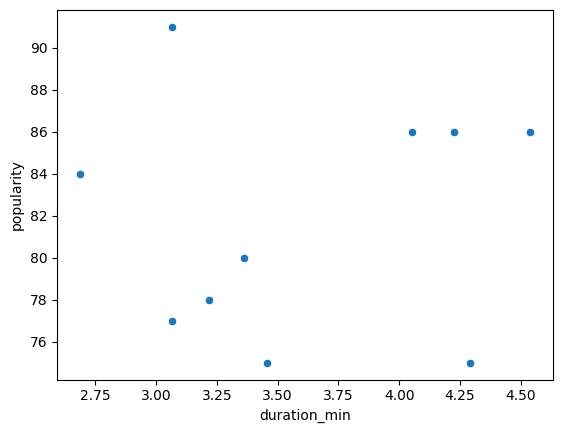

In [6]:
# I made no further modifications to the table; despite the commands used, there were no visible changes.
sns.scatterplot(data = df_songs_sorted, x = "duration_min", y = "popularity")

## Conclusion
Judging by the graph, there is no correlation between the popularity of a song and its duration. 